In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import networkx as nx
import csv
import numpy as np
import sklearn
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
merged_data = pd.read_csv('/content/drive/MyDrive/DS project/census_bike_merged.csv')

merged_data = merged_data.rename(columns={'renters_owners_ratio': 'owners_renters_ratio',
                            'renters_owners_pre-2000_ratio': 'owners_renters_pre-2000_ratio'} )

In [ ]:
df=merged_data

# Houseownership: Pre2000 Houseowner VS. Renter

In [ ]:
columns = df.columns[[0,1,2] + list(range(24, 30))] # Add all race columns
df_houseownership = df[list(columns)]

df_houseownership_melt = pd.melt(df_houseownership, id_vars=['year', 'tract', 'neighborhood'], var_name='ratio', value_name='percentage')
df_houseownership_melt['tract'] = df_houseownership_melt['tract'].astype('int').astype('object')
df_houseownership_melt

,year,tract,neighborhood,ratio,percentage
0,2010,1001,Dorchester,percent_owners,0.298655
1,2011,1001,Dorchester,percent_owners,0.263956
2,2012,1001,Dorchester,percent_owners,0.276745
3,2013,1001,Dorchester,percent_owners,0.250481
4,2014,1001,Dorchester,percent_owners,0.263776
...,...,...,...,...,...
4171,2009,923,Dorchester,owners_renters_pre-2000_ratio,NaN
4172,2022,923,Dorchester,owners_renters_pre-2000_ratio,NaN
4173,2008,924,Dorchester,owners_renters_pre-2000_ratio,NaN
4174,2009,924,Dorchester,owners_renters_pre-2000_ratio,NaN


Text(0.5, 1.0, '')

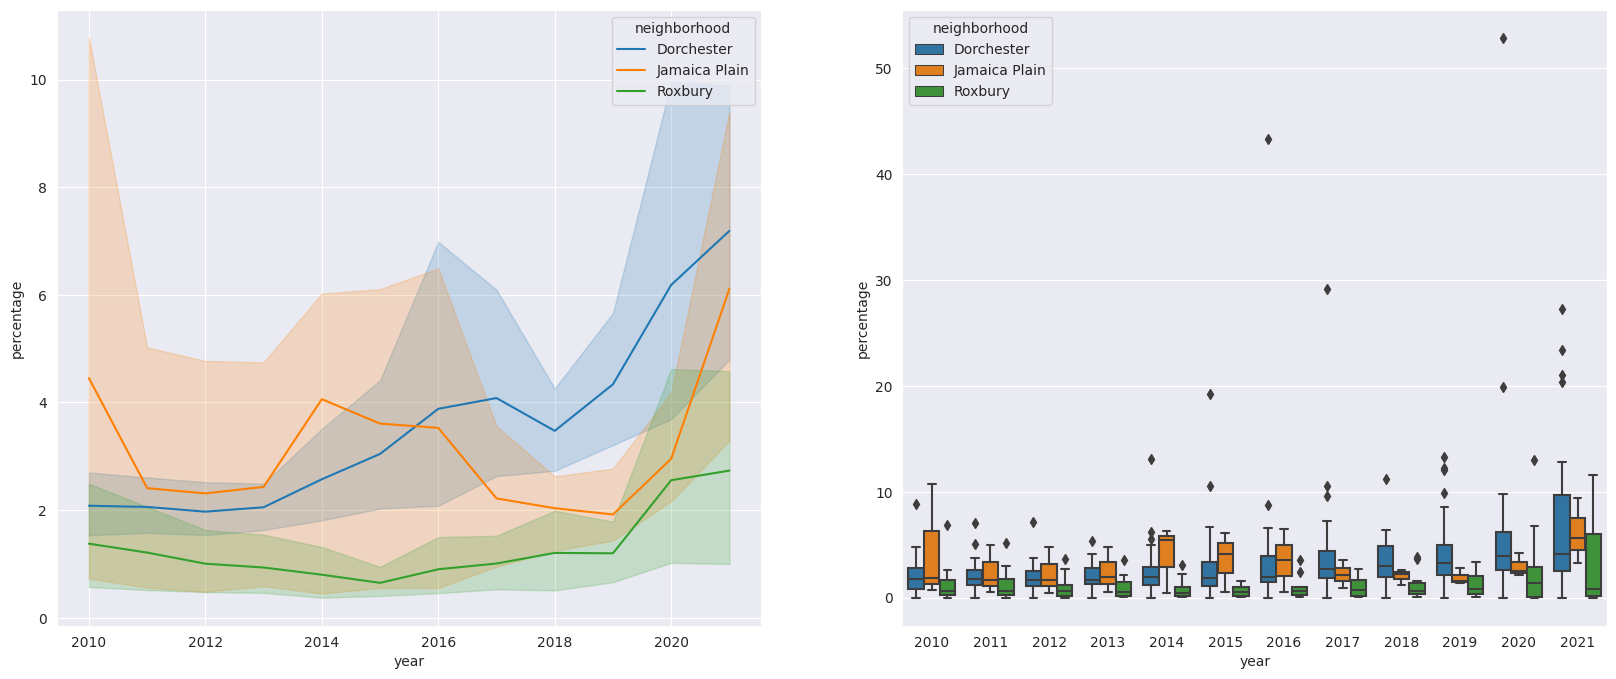

In [ ]:
sns.set_style('darkgrid')
#custom_palette = [ "#33a02c", "#1f78b4", "#ff7f00"]
#custom_palette = sns.color_palette("Set2")

fig, ax = plt.subplots(1,2, figsize=(20,8))

custom_palette = [ "#1f78b4", "#ff7f00", "#33a02c"]
sns.lineplot(x='year', y='percentage', hue='neighborhood',
            data=df_houseownership_melt[(df_houseownership_melt['ratio']=='owners_renters_pre-2000_ratio') ],
             palette=custom_palette,
             ax=ax[0])

ax[0].set_title("")


sns.boxplot(x='year', y='percentage', hue='neighborhood',
            data=df_houseownership_melt[(df_houseownership_melt['year'] >= 2010)
                                        & (df_houseownership_melt['year'] <= 2021)
                                        & (df_houseownership_melt['ratio'] == 'owners_renters_pre-2000_ratio')]
                                       ,palette=custom_palette ,ax=ax[1] )
ax[1].set_title("")


Here we are looking at owners_renter_pre2000_ratio, which is defined as the number of owners moved in before 2000 relative to that of renters moved in before 2000.
* The first thing we noticed is that the ratio is typically larger than 1, indicating that the number of pre2000 owners exceeds that of pre2000 renters. It should not be surprising since we understand that renters do tend to move out more frequently. However, we do notice that the trend is not the same for all three neighborhoods; starting around 2014, owners_renter_pre2000_ratio in Jamaica Plain went on a decreasing trend, while the same ratio began to rise in Dorchester.
* Both Dorchester and Jamaica Plain have owners_renter_pre2000_ratio > 2, while this ratio in Roxbury has been hovering between 1 and 2, its ratio made did not break through 2 until 2020.
* The boxplot on the right shows the distributions of owners_renter_pre2000_ratio in each year during the time period, we see that Dorchester is indeed increasing in a more noticeable trend, and both Dorchester and Roxbury have a much larger variation for this ratio after 2020.


# Property: Monthly Mortage and Rent

In [ ]:
columns = df.columns[[0,1,2] + list(range(14, 17))] # Add all race columns
df_prop_val = df[list(columns)]

df_prop_val['monthly_rent_to_prop_val'] = df_prop_val['median_monthly_rent']/ df_prop_val['median_value']
df_prop_val['monthly_mort_to_prop_val'] = df_prop_val['median_monthly_mort']/ df_prop_val['median_value']

df_prop_val_melt = pd.melt(df_prop_val, id_vars=['year', 'tract', 'neighborhood'], var_name='value_type', value_name='value')
df_prop_val_melt['tract'] = df_prop_val_melt['tract'].astype('int').astype('object')
df_prop_val_melt

<ipython-input-10-af989a804803>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prop_val['monthly_rent_to_prop_val'] = df_prop_val['median_monthly_rent']/ df_prop_val['median_value']
<ipython-input-10-af989a804803>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prop_val['monthly_mort_to_prop_val'] = df_prop_val['median_monthly_mort']/ df_prop_val['median_value']


,year,tract,neighborhood,value_type,value
0,2010,1001,Dorchester,median_value,280400.0
1,2011,1001,Dorchester,median_value,276900.0
2,2012,1001,Dorchester,median_value,268000.0
3,2013,1001,Dorchester,median_value,261700.0
4,2014,1001,Dorchester,median_value,279300.0
...,...,...,...,...,...
3475,2009,923,Dorchester,monthly_mort_to_prop_val,NaN
3476,2022,923,Dorchester,monthly_mort_to_prop_val,NaN
3477,2008,924,Dorchester,monthly_mort_to_prop_val,NaN
3478,2009,924,Dorchester,monthly_mort_to_prop_val,NaN


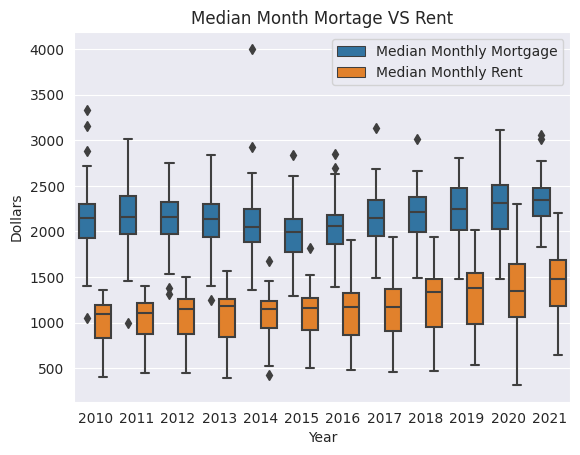

In [ ]:
boxplot = sns.boxplot(data= df_prop_val_melt[(df_prop_val_melt['year'] >= 2010) & (df_prop_val_melt['year'] <= 2021) &
                               ((df_prop_val_melt['value_type'] == 'median_monthly_mort') |
                                (df_prop_val_melt['value_type'] == 'median_monthly_rent'))],
            x='year', y='value',
            hue='value_type')
plt.ylabel('Dollars')
plt.xlabel('Year')

legend_labels = {'median_monthly_mort': 'Median Monthly Mortgage',
                 'median_monthly_rent': 'Median Monthly Rent'}

handles, labels = boxplot.get_legend_handles_labels()
unique_categories = df_prop_val_melt['value_type'].unique()

unique_handles = [handles[i] for i, label in enumerate(labels) if label in unique_categories]
unique_labels = [ 'Median Monthly Mortgage', 'Median Monthly Rent']


boxplot.legend(title='', handles=unique_handles, labels=unique_labels)
plt.title('Median Month Mortage VS Rent')
# Show the plot
plt.show()



This is the comparison between median monthly mortgage and monthly rent without differentiating different neighborhoods. From 2010 to 2021, median monthly rent has been smoothly increasing in general, while median monthly mortgage slightly fall off track from 2013 to 2017.

Text(0.5, 0.98, 'Comparison Between Monthly Mortage and Rent over Years in Different Neighborhoods')

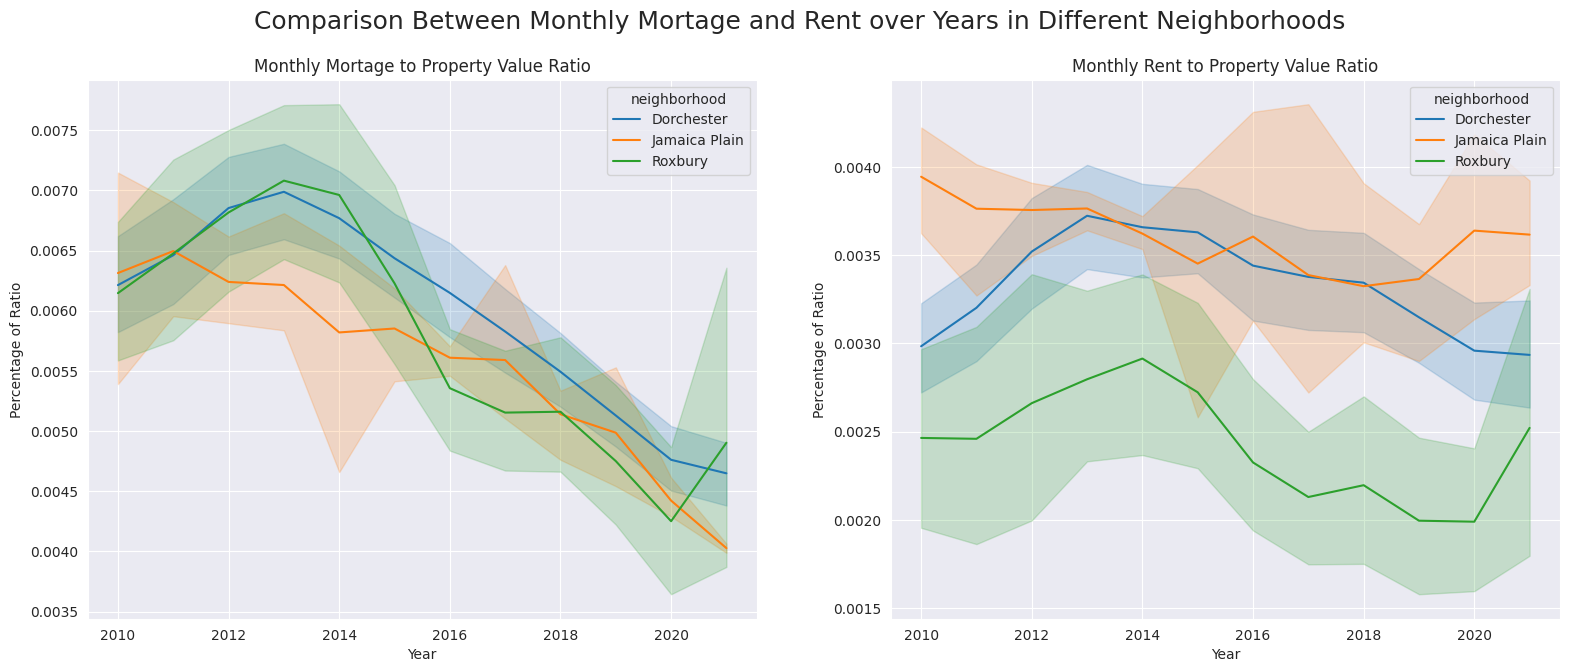

In [ ]:
# Comparison Between Monthly Mortage and Rent over Years in Different Neighborhoods

fig, ax = plt.subplots(1,2, figsize=(19,7))

sns.lineplot(data=df_prop_val_melt[(df_prop_val_melt['value_type'] == 'monthly_mort_to_prop_val') ],
            x='year', y='value',
            hue='neighborhood', ax=ax[0])
ax[0].set_ylabel('Percentage of Ratio')
ax[0].set_xlabel('Year')
ax[0].set_title('Monthly Mortage to Property Value Ratio')



sns.lineplot(data=df_prop_val_melt[df_prop_val_melt['value_type'] == 'monthly_rent_to_prop_val'],
            x='year', y='value',
            hue='neighborhood', ax=ax[1])
ax[1].set_ylabel('Percentage of Ratio')
ax[1].set_xlabel('Year')
ax[1].set_title('Monthly Rent to Property Value Ratio')

fig.suptitle('Comparison Between Monthly Mortage and Rent over Years in Different Neighborhoods',
             fontsize=18)

Text(0.5, 0.98, 'Comparison Between Monthly Mortage and Proporty Value in 2010 and 2021 for Different Neighborhoods')

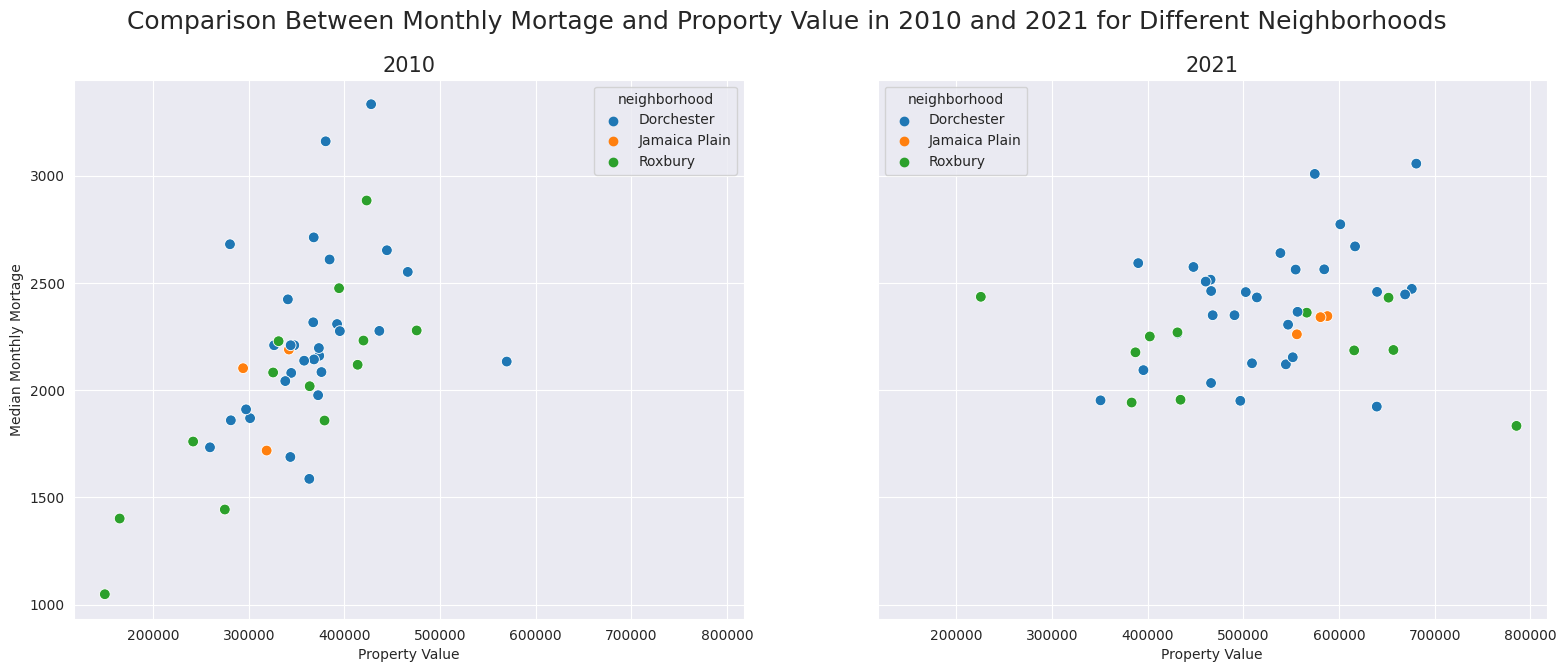

In [ ]:
# Comparison Between Monthly Mortage and Proporty Value in 2010 and 2021 for Different Neighborhoods

fig, ax = plt.subplots(1,2, figsize=(19,7), sharey=True, sharex=True)

sns.scatterplot(data=df[df['year']==2010],
            x='median_value', y='median_monthly_mort',
            hue='neighborhood', s=60, ax=ax[0])
ax[0].set_title('2010', fontsize =15)

ax[0].set_ylabel('Median Monthly Mortage')
ax[0].set_xlabel('Property Value')

sns.scatterplot(data=df[df['year']==2021],
            x='median_value', y='median_monthly_mort',
            hue='neighborhood', s=60, ax=ax[1])
ax[1].set_title('2021', fontsize =15)

ax[1].set_ylabel('Median Monthly Mortage')
ax[1].set_xlabel('Property Value')

fig.suptitle('Comparison Between Monthly Mortage and Proporty Value in 2010 and 2021 for Different Neighborhoods',
             fontsize=18)



This above scatterplot shows the spread and distribution of median monthly mortgage and the corresponding property values.
* The spread is different in 2021 than in 2010; in 2010, the lower bound for median monthly mortgage was 1,000, all three tracts that this value lower than 1,500 are all from Roxbury. In 2021, both Roxbury and Dorchestor had similar value for their lowest median monthly mortgage, and there was no median monthly mortgage lower than 1,500 for all census tracts.
* In 2010, the upper bound for property value was approximately 500,000, with an exception (around 550,000) from Dorchester; in 2021, the approximate upper bound increased tp 700,000, and yet this year the exception(around
 800,000) was from Roxbury


In [ ]:
df_roxbury = df[df['neighborhood']=='Roxbury']
df_roxbury.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192 entries, 144 to 632
Data columns (total 39 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   tract                          192 non-null    float64
 1   year                           192 non-null    int64  
 2   neighborhood                   192 non-null    object 
 3   total_population               156 non-null    float64
 4   male                           156 non-null    float64
 5   female                         156 non-null    float64
 6   median_age                     156 non-null    float64
 7   race_white                     156 non-null    float64
 8   race_black                     156 non-null    float64
 9   race_ai_alaskan                156 non-null    float64
 10  race_asian                     156 non-null    float64
 11  race_hawaiian                  156 non-null    float64
 12  race_other                     156 non-null    f

# Age (Roxbury)

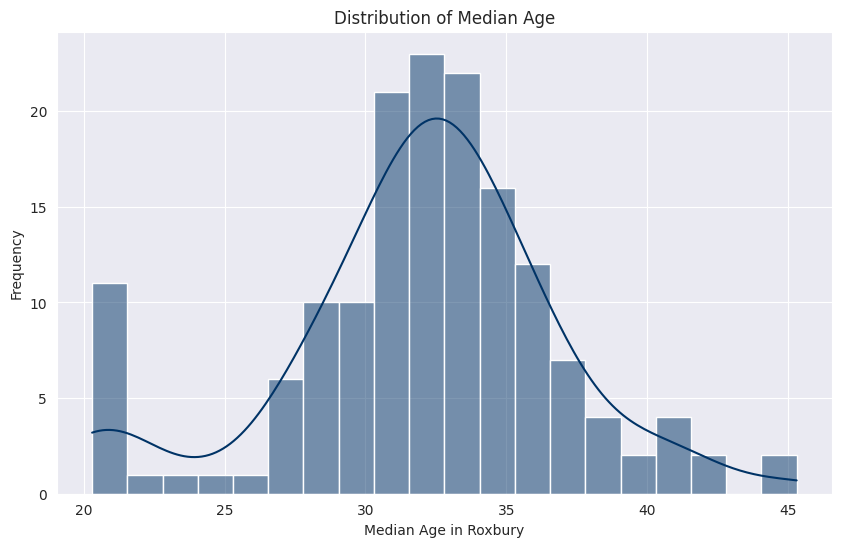

In [69]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_roxbury, x='median_age', bins=20, kde=True, color=(0.0, 0.2, 0.4))
plt.title('Distribution of Median Age')
plt.xlabel('Median Age in Roxbury')
plt.ylabel('Frequency')
plt.show()

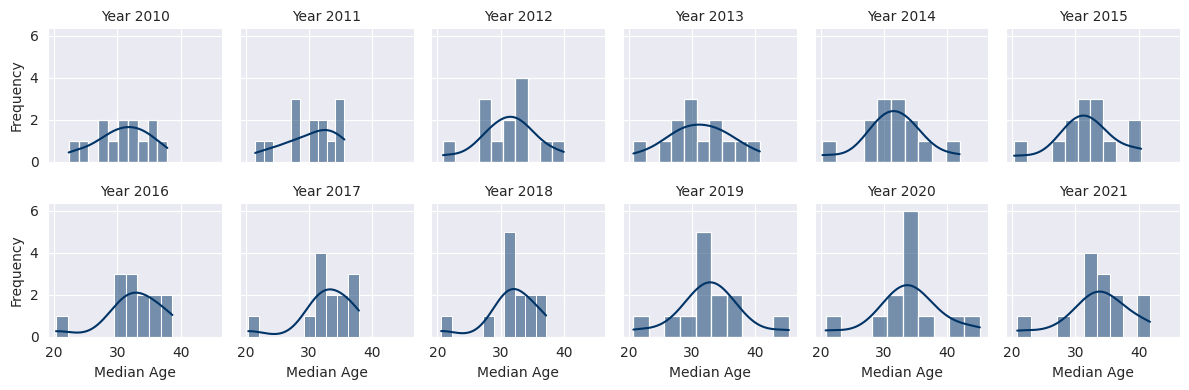

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_roxbury contains the necessary data

# Set the style (optional)
sns.set_style("darkgrid")

# Create a FacetGrid with a histogram for each year
g = sns.FacetGrid(df_roxbury[(df_roxbury['year']>=2010) &(df_roxbury['year']<=2021)], col="year", col_wrap=6, height=2)
g.map(sns.histplot, 'median_age', bins=10, kde=True, color=(0.0, 0.2, 0.4))

# Set titles and labels
g.set_titles("Year {col_name}")
g.set_axis_labels('Median Age', 'Frequency')

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

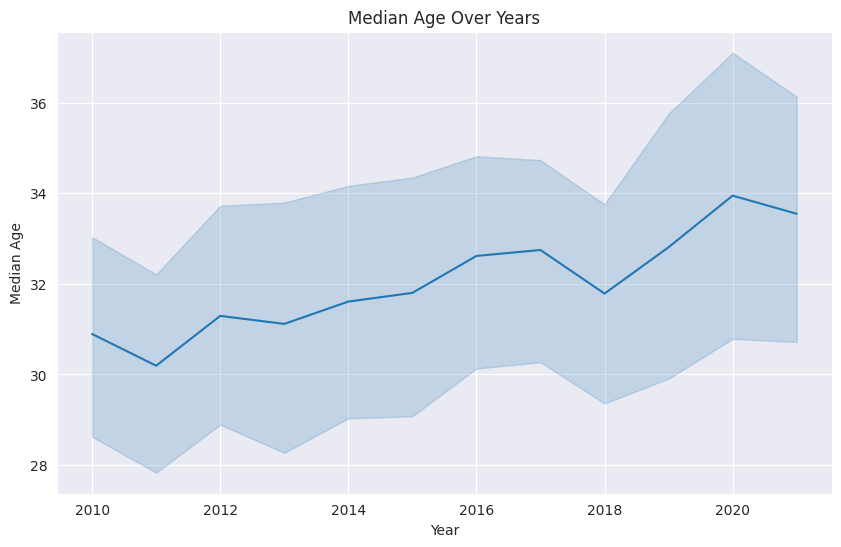

In [61]:
plt.figure(figsize=(8, 5))
sns.lineplot(data=df_roxbury, x='year', y='median_age')
plt.title('Median Age Over Years')
plt.xlabel('Year')
plt.ylabel('Median Age')
plt.show()

# Race (Roxbury)

In [ ]:
columns = df.columns[[0,1,2] + list(range(7, 14))] # Add all race columns
df_race = df[list(columns)]

df_race_melt = pd.melt(df_race, id_vars=['year', 'tract', 'neighborhood'], var_name='race', value_name='percentage')
df_race_melt['tract'] = df_race_melt['tract'].astype('int').astype('object')


def transform_race(value):
    if value == 'race_hispanic':
        return 'ethnicity_hispanic'
    elif value == 'race_white':
        return 'white'
    else:
        return 'non_white'

# Apply the transformation to the 'race' column
df_race_melt['race_2'] = df_race_melt['race'].apply(transform_race)
df_race_melt

,year,tract,neighborhood,race,percentage,race_2
0,2010,1001,Dorchester,race_white,0.063,white
1,2011,1001,Dorchester,race_white,0.109,white
2,2012,1001,Dorchester,race_white,0.074,white
3,2013,1001,Dorchester,race_white,0.112,white
4,2014,1001,Dorchester,race_white,0.131,white
...,...,...,...,...,...,...
4867,2009,923,Dorchester,race_hispanic,NaN,ethnicity_hispanic
4868,2022,923,Dorchester,race_hispanic,NaN,ethnicity_hispanic
4869,2008,924,Dorchester,race_hispanic,NaN,ethnicity_hispanic
4870,2009,924,Dorchester,race_hispanic,NaN,ethnicity_hispanic


In [ ]:
df_roxbury_race_melt = df_race_melt[df_race_melt['neighborhood']=='Roxbury']

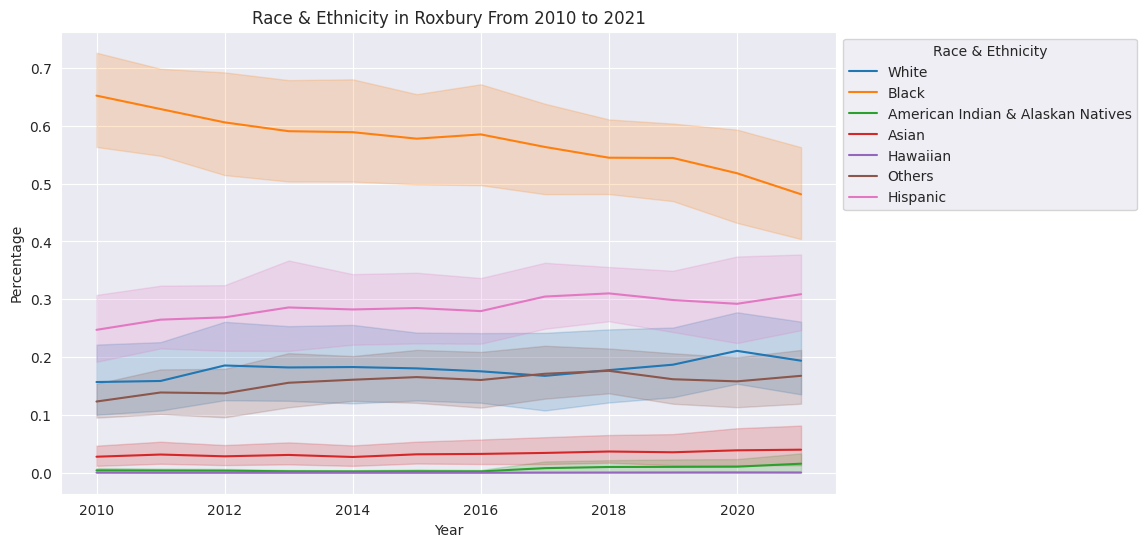

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_roxbury_race_melt contains the necessary data

# Set the figure size
plt.figure(figsize=(10, 6))

# Create the line plot
lineplot_race = sns.lineplot(data=df_roxbury_race_melt, x='year', y='percentage', hue='race')

# Customize the legend
handles, labels = lineplot_race.get_legend_handles_labels()
unique_categories = df_roxbury_race_melt['race'].unique()

unique_handles = [handles[i] for i, label in enumerate(labels) if label in unique_categories]
unique_labels = ['White', 'Black', 'American Indian & Alaskan Natives',
                 'Asian', 'Hawaiian', 'Others', 'Hispanic']

# Create a new legend with the specified labels and place it outside the graph
lineplot_race.legend(title='Race & Ethnicity', handles=unique_handles, labels=unique_labels,
                     bbox_to_anchor=(1, 1), loc='upper left')

# Modify x and y-axis titles
lineplot_race.set_xlabel('Year')
lineplot_race.set_ylabel('Percentage')
lineplot_race.set_title('Race & Ethnicity in Roxbury From 2010 to 2021')

# Show the plot
plt.show()


<Axes: xlabel='year', ylabel='percentage'>

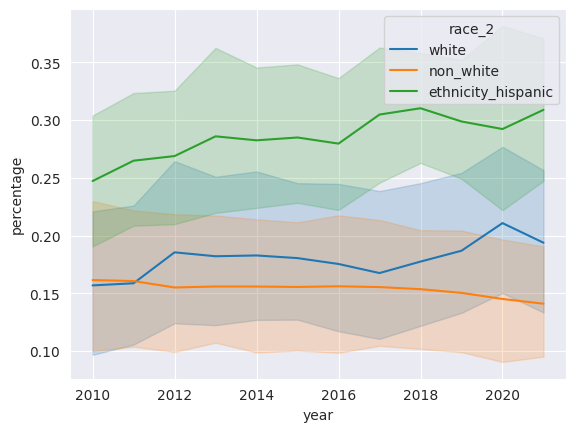

In [ ]:
sns.lineplot(data =df_roxbury_race_melt, x='year', y='percentage', hue='race_2')

<Axes: xlabel='year', ylabel='percentage'>

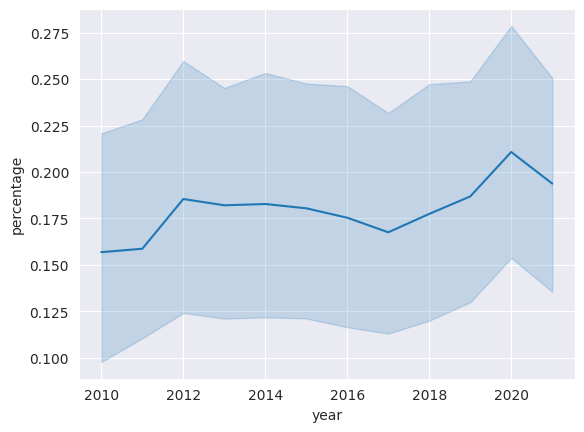

In [55]:
sns.lineplot(data =df_roxbury_race_melt[df_roxbury_race_melt['race_2']=='white'], x='year', y='percentage')

# Income (Roxbury)

In [ ]:
columns = df.columns[[0,1,2] + [17,18]] # Add all income columns
df_income = df[list(columns)]

df_income_melt = pd.melt(df_income, id_vars=['year', 'tract', 'neighborhood'], var_name='income_estimate_type', value_name='dollars')
df_income_melt['tract'] = df_income_melt['tract'].astype('int').astype('object')

df_roxbury_income_melt = df_income_melt[df_income_melt['neighborhood']=='Roxbury']

df_roxbury_income_melt

,year,tract,neighborhood,income_estimate_type,dollars
144,2010,801,Roxbury,median_income,NaN
145,2011,801,Roxbury,median_income,40329.0
146,2012,801,Roxbury,median_income,30882.0
147,2013,801,Roxbury,median_income,31712.0
148,2014,801,Roxbury,median_income,27318.0
...,...,...,...,...,...
1324,2009,820,Roxbury,mean_income,NaN
1325,2022,820,Roxbury,mean_income,NaN
1326,2008,821,Roxbury,mean_income,NaN
1327,2009,821,Roxbury,mean_income,NaN


<Axes: xlabel='year', ylabel='dollars'>

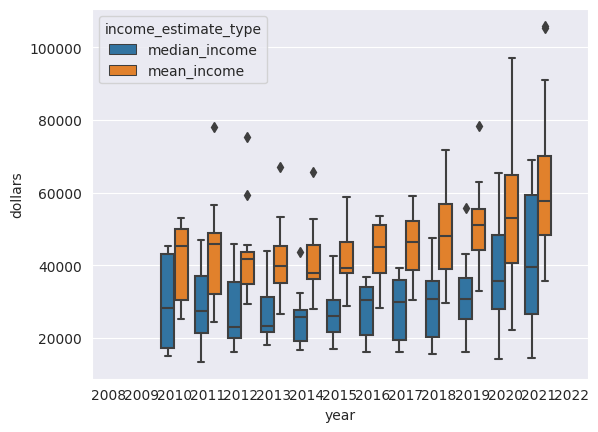

In [ ]:
sns.boxplot(data = df_roxbury_income_melt, x='year', y='dollars', hue= 'income_estimate_type')

# Houseowner (Roxbury)

In [ ]:
columns = df.columns[[0,1,2] + list(range(24, 30))] # Add all race columns
df_houseownership = df[list(columns)]

df_houseownership_melt = pd.melt(df_houseownership, id_vars=['year', 'tract', 'neighborhood'], var_name='ratio', value_name='percentage')
df_houseownership_melt['tract'] = df_houseownership_melt['tract'].astype('int').astype('object')
df_roxbury_houseownership_melt = df_houseownership_melt[df_houseownership_melt['neighborhood' ]== 'Roxbury']
df_roxbury_houseownership_melt

,year,tract,neighborhood,ratio,percentage
144,2010,801,Roxbury,percent_owners,0.488595
145,2011,801,Roxbury,percent_owners,0.456805
146,2012,801,Roxbury,percent_owners,0.394925
147,2013,801,Roxbury,percent_owners,0.439698
148,2014,801,Roxbury,percent_owners,0.348408
...,...,...,...,...,...
4108,2009,820,Roxbury,owners_renters_pre-2000_ratio,NaN
4109,2022,820,Roxbury,owners_renters_pre-2000_ratio,NaN
4110,2008,821,Roxbury,owners_renters_pre-2000_ratio,NaN
4111,2009,821,Roxbury,owners_renters_pre-2000_ratio,NaN


Text(0.5, 1.0, 'The Percentage of Houseowners in Roxbury (2010-2021)')

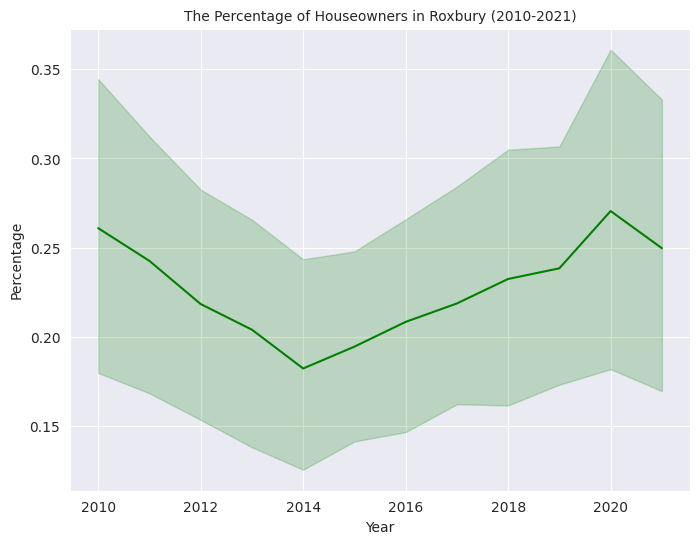

In [105]:
plt.figure(figsize=(8, 6))
sns.lineplot(x='year', y='percentage',
             data= df_roxbury_houseownership_melt[(df_roxbury_houseownership_melt['ratio']=='percent_owners')],
             color='green')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.title('The Percentage of Houseowners in Roxbury (2010-2021)', fontsize=10)

In [72]:
columns = df.columns[[0,1,2] + list(range(14, 17))] # Add all race columns
df_prop_val = df[list(columns)]

df_prop_val['monthly_rent_to_prop_val'] = df_prop_val['median_monthly_rent']/ df_prop_val['median_value']
df_prop_val['monthly_mort_to_prop_val'] = df_prop_val['median_monthly_mort']/ df_prop_val['median_value']

df_prop_val_melt = pd.melt(df_prop_val, id_vars=['year', 'tract', 'neighborhood'], var_name='value_type', value_name='value')
df_prop_val_melt['tract'] = df_prop_val_melt['tract'].astype('int').astype('object')
df_roxbury_prop_val_melt = df_prop_val_melt[df_prop_val_melt['neighborhood']=='Roxbury']
df_roxbury_prop_val_melt

<ipython-input-72-0e2e5aff546d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prop_val['monthly_rent_to_prop_val'] = df_prop_val['median_monthly_rent']/ df_prop_val['median_value']
<ipython-input-72-0e2e5aff546d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prop_val['monthly_mort_to_prop_val'] = df_prop_val['median_monthly_mort']/ df_prop_val['median_value']


,year,tract,neighborhood,value_type,value
144,2010,801,Roxbury,median_value,394400.0
145,2011,801,Roxbury,median_value,290600.0
146,2012,801,Roxbury,median_value,246600.0
147,2013,801,Roxbury,median_value,240200.0
148,2014,801,Roxbury,median_value,248100.0
...,...,...,...,...,...
3412,2009,820,Roxbury,monthly_mort_to_prop_val,NaN
3413,2022,820,Roxbury,monthly_mort_to_prop_val,NaN
3414,2008,821,Roxbury,monthly_mort_to_prop_val,NaN
3415,2009,821,Roxbury,monthly_mort_to_prop_val,NaN


# Property Value & Rent (Roxbury)

In [81]:
df_roxbury_prop_val_melt['value_type'].unique()

array(['median_value', 'median_monthly_mort', 'median_monthly_rent',
       'monthly_rent_to_prop_val', 'monthly_mort_to_prop_val'],
      dtype=object)

Text(0.5, 1.0, 'Median Monthly Rent to Property Value Ratio in Roxbury (2010-2021)')

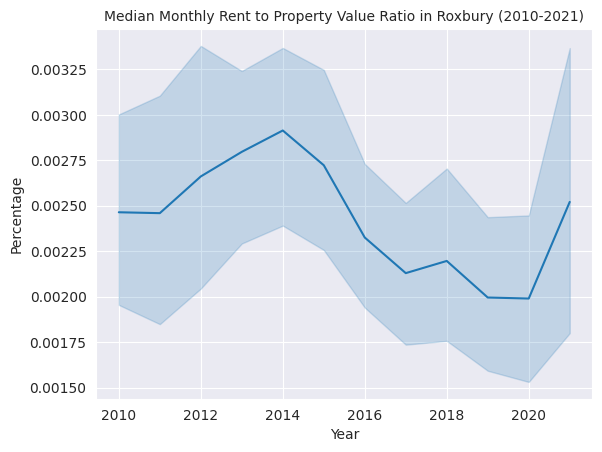

In [104]:

sns.lineplot(data = df_roxbury_prop_val_melt[df_roxbury_prop_val_melt['value_type']=='monthly_rent_to_prop_val'],
             x='year', y='value')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.title('Median Monthly Rent to Property Value Ratio in Roxbury (2010-2021)', fontsize=10)

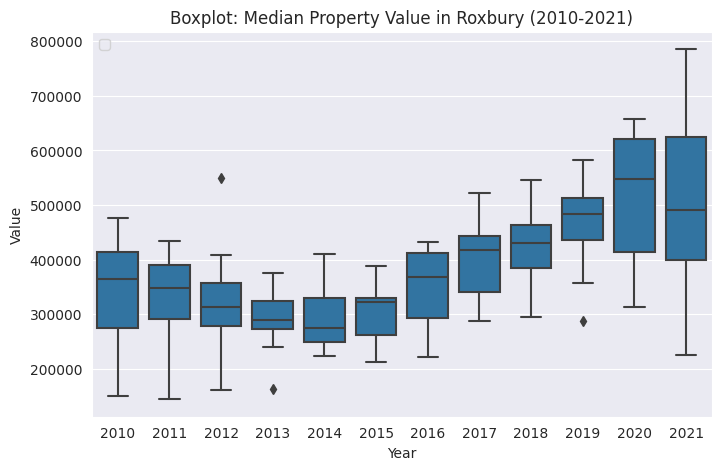

In [98]:
# Filter the data for the specified value types and years
filtered_data = df_roxbury_prop_val_melt[
    (df_roxbury_prop_val_melt['value_type'].isin([ 'median_value'])) &
    (df_roxbury_prop_val_melt['year'].between(2010, 2021))
]

# Create a boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(data=filtered_data, x='year', y='value', hue='value_type')
plt.legend([])
# Set titles and labels
plt.title('Boxplot: Median Property Value in Roxbury (2010-2021)')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend
# Show the plot
plt.show()

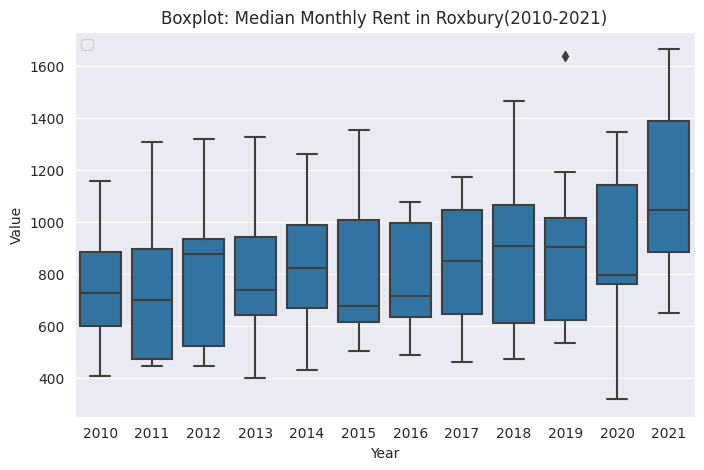

In [97]:
# Filter the data for the specified value types and years
filtered_data = df_roxbury_prop_val_melt[
    (df_roxbury_prop_val_melt['value_type'].isin([ 'median_monthly_rent'])) &
    (df_roxbury_prop_val_melt['year'].between(2010, 2021))
]

# Create a boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(data=filtered_data, x='year', y='value', hue='value_type')

# Set titles and labels
plt.title('Boxplot: Median Monthly Rent in Roxbury(2010-2021)')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend([])
# Show the plot
plt.show()

In [83]:
df_roxbury_prop_val_melt[(df_roxbury_prop_val_melt['value_type']=='median_monthly_rent')]

,year,tract,neighborhood,value_type,value
1536,2010,801,Roxbury,median_monthly_rent,820.0
1537,2011,801,Roxbury,median_monthly_rent,866.0
1538,2012,801,Roxbury,median_monthly_rent,877.0
1539,2013,801,Roxbury,median_monthly_rent,977.0
1540,2014,801,Roxbury,median_monthly_rent,1007.0
...,...,...,...,...,...
2020,2009,820,Roxbury,median_monthly_rent,NaN
2021,2022,820,Roxbury,median_monthly_rent,NaN
2022,2008,821,Roxbury,median_monthly_rent,NaN
2023,2009,821,Roxbury,median_monthly_rent,NaN
